# Segmentation: Clustering and Classification

<font size=4><b>Segmentation</b><br></font>
Segmentation is the process of categorization of a target population into groups that can be differentiated from each other based on combinations of shared characteristics.
It is a form of optimization and requires an iterative approach.

<font size=4><b>Market Segmentation</b><br></font>
One of the domains where segmentation is essential is in market segmentation, which allows companies to devise optimum marketing strategies. 
In a well-segmented market the smaller groups would appear homogeneous (relative to the overall market) in terms of consumption patterns, product interest, resonse to marketing efforts etc. 

A marketeer that understands the differences between segments will be able to make better strategic choices for product design, marketing budgets, product positioning and nuanced promotional efforts. 
However, the most difficult part in effective market segmentation is finding actionable results which would allow for differentiated actions in the real world.  

Nevertheless, below is an effort to identify segments of customers for a subscription product.

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

<a id='index'></a>
## Index
- [1) Import packages](#1%29-Import-packages)
- [2) Pre-defined functions](#2%29-Pre-defined-functions)
- [3) Load data](#3%29-Load-data)
- [4) Preliminary data exploration](#4%29-Preliminary-data-exploration)
- [5) Feature adjustments](#5%29-Feature-adjustments)
    - [Convert categorical variables to numerical](#Convert-categorical-variables-to-numerical)
    - [Standardize data](#Standardize-data)
- [Defined functions](#Defined-functions)
- [6) Cluster analysis](#6%29-Cluster-analysis)
    - [a) Mean-based clustering (k-means)](#a%29-Mean-based-clustering-(k-means%29)
        - [Unstandardized data](#Unstandardized-data)
            - [Segment distinguishing features](#obs-kmeans)
        - [Standardized data](#Standardized-data)
            - [Segment distinguishing features](#obs-kmeans2)
    - [b) Hierarchical clustering](#b%29-Hierarchical-clustering)
        - [Dendrogram](#Dendrogram)
        - [Goodness-of-fit test](#Goodness-of-fit-test)
        - [Segment assignments](#Segment-assignments)
        - [Segment summary](#Segment-summary)
    - [c) Model-based clustering](#c%29-Model-based-clustering)
    - [d) Latent Class Analysis](#d%29-Latent-Class-Analysis)
- [7) Comparing Cluster Solutions](#7%29-Comparing-Cluster-Solutions)
- [8) Concluding summary](#8%29-Concluding-summary)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 1) Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Some preliminary workings

In [2]:
sns.set_theme(rc={'figure.facecolor':'w'})
np.set_printoptions(linewidth=90)
# plt.rcParams['figure.dpi'] = 150

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 2) Pre-defined functions

##### Function to return frequency table

In [3]:
# Function to return frequency table
def fd(data, sorted=False):
    fd = pd.concat([data.value_counts(sort=False), 
               round(data.value_counts(sort=False, normalize=True)*100)], 
                   axis=1, keys=['freq','%']).astype(np.int).sort_index()
    if sorted:
        fd = fd.sort_values(by='freq', ascending=False)
    return fd

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 3) Load data

In [4]:
dfo = pd.read_csv("http://goo.gl/qw303p")

# Export for safekeep
# dfo.to_csv('Subscription Data.csv')

print(dfo.shape)
dfo.head()

(300, 7)


,age,gender,income,kids,ownHome,subscribe,Segment
0,47.316133,Male,49482.810438,2,ownNo,subNo,Suburb mix
1,31.386839,Male,35546.288300,1,ownYes,subNo,Suburb mix
2,43.200342,Male,44169.186377,0,ownYes,subNo,Suburb mix
3,37.316995,Female,81041.986385,1,ownNo,subNo,Suburb mix
4,40.954390,Female,79353.014443,3,ownYes,subNo,Suburb mix


In [5]:
# Drop the 'segment' column and save it separately
df = dfo.drop('Segment', axis=1).copy()
y = dfo['Segment'].copy()

print(y.shape)
df.head(1)

(300,)


,age,gender,income,kids,ownHome,subscribe
0,47.316133,Male,49482.810438,2,ownNo,subNo


 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 4) Preliminary data exploration

### Check for data integrity

#### Check for missing values

In [6]:
df.isnull().any().any()

False

#### Check for data consistency
To ensure that the variables have been understood as per their nature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        300 non-null    float64
 1   gender     300 non-null    object 
 2   income     300 non-null    float64
 3   kids       300 non-null    int64  
 4   ownHome    300 non-null    object 
 5   subscribe  300 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


<div class="alert alert-block alert-info">
    Numeric variables have been read as numeric (float and int) and categorical as string (object).<br>
    We can save categorical columns as dtype 'category' instead.
</div>

In [8]:
# Saving categorical columns as 'category'
df.gender = df.gender.astype('category')
df.ownHome = df.ownHome.astype('category')
df.subscribe = df.subscribe.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        300 non-null    float64 
 1   gender     300 non-null    category
 2   income     300 non-null    float64 
 3   kids       300 non-null    int64   
 4   ownHome    300 non-null    category
 5   subscribe  300 non-null    category
dtypes: category(3), float64(2), int64(1)
memory usage: 8.3 KB


#### Summary statistics

In [9]:
# Numerical features
df.describe()

,age,income,kids
count,300.000000,300.000000,300.000000
mean,41.199650,50936.536184,1.270000
std,12.707427,20137.549430,1.408443
min,19.259932,-5183.354243,0.000000
25%,33.012059,39656.283622,0.000000
50%,39.487674,52014.352449,1.000000
75%,47.895657,61403.176264,2.000000
max,80.486179,114278.255567,7.000000


In [10]:
# Categorical features
df.describe(include=['object','category'])

,gender,ownHome,subscribe
count,300,300,300
unique,2,2,2
top,Female,ownNo,subNo
freq,157,159,260


<div class="alert alert-block alert-info">
    - None of the columns has min or max values that are very unusual.<br>
    - Income has a negative minimum value. That is a plausible scenario in case of a person with monthly debt repayments due.<br>
    - Max kids = 7. Sure, I can believe that. Some folks must be quite optimistic that humanity will tackle climate change well.<br><br>
    <b>Overall, there are no obviously unusual values in the columns and the data seems to be consistent and complete.</b><br>
</div>

[go to toc](#index)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### Data distribution

In [11]:
# Numerical columns
df_num = df.select_dtypes(include='number')
df_num.head(1)

,age,income,kids
0,47.316133,49482.810438,2


#### Histograms

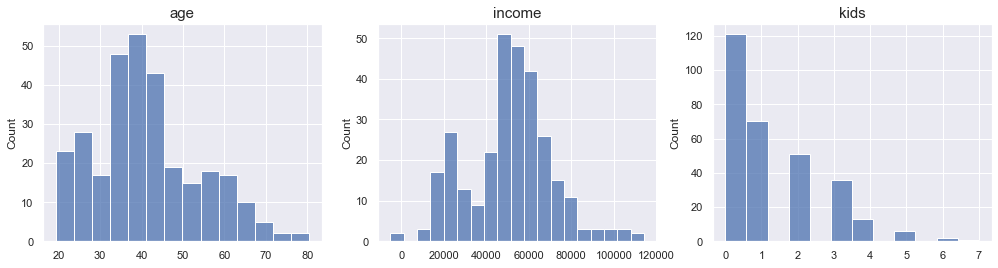

In [12]:
f, axs = plt.subplots(1,3, figsize=(17,4))
for i,col in enumerate(df_num.columns):
    sns.histplot(df[col], ax=axs[i])
    axs[i].set_title(col, fontsize=15)
    axs[i].set_xlabel('')

#### Value counts

In [13]:
for var in df.select_dtypes(include='category').columns:
    print(f'Variable : {var}')
    display(pd.concat([df[var].value_counts(), df[var].value_counts(normalize=True).round(3)*100], 
                      axis=1, keys=['count','perc']))
    print('\n')

Variable : gender


,count,perc
Female,157,52.3
Male,143,47.7




Variable : ownHome


,count,perc
ownNo,159,53.0
ownYes,141,47.0




Variable : subscribe


,count,perc
subNo,260,86.7
subYes,40,13.3


[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 5) Feature adjustments
In order to perform techiques of cluster analysis, we will need to convert non-numeric data into numerical forms. Dummy variables will be introduced for categorical features.

#### Convert categorical variables to numerical

In [14]:
# Convert categorical columns to dummies
dfn = pd.get_dummies(df, drop_first=True)
dfn.head()

,age,income,kids,gender_Male,ownHome_ownYes,subscribe_subYes
0,47.316133,49482.810438,2,1,0,0
1,31.386839,35546.288300,1,1,1,0
2,43.200342,44169.186377,0,1,1,0
3,37.316995,81041.986385,1,0,0,0
4,40.954390,79353.014443,3,0,1,0


In [15]:
# Rename dummy columns
dfn.rename(columns={'gender_Male':'male', 'ownHome_ownYes':'homeOwner', 
                    'subscribe_subYes':'subscriber'}, inplace=True)
dfn.head(1)

,age,income,kids,male,homeOwner,subscriber
0,47.316133,49482.810438,2,1,0,0


#### Standardize data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Standardize data
scaler = StandardScaler()
dfn_sz = scaler.fit_transform(dfn)

# use sample std for transformation (like R)
# dfn_sz = dfn.apply(lambda x: (x - np.mean(x))/np.std(x, ddof=1))

dfn_sz[0:6,0:6]

array([[ 0.48213561, -0.07231042,  0.51916875,  1.04780824, -0.94169658, -0.39223227],
       [-0.77350095, -0.7655332 , -0.19202132,  1.04780824,  1.06191317, -0.39223227],
       [ 0.15770582, -0.33661777, -0.90321138,  1.04780824,  1.06191317, -0.39223227],
       [-0.30605269,  1.49748865, -0.19202132, -0.95437311, -0.94169658, -0.39223227],
       [-0.01933277,  1.41347674,  1.23035881, -0.95437311,  1.06191317, -0.39223227],
       [ 0.14458317,  0.35847801,  1.94154888,  1.04780824,  1.06191317, -0.39223227]])

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## Defined functions

##### Function to reduce data to 2 principal components and mark clusters

In [18]:
# Function to reduce data to 2 principal components and mark clusters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

def clustplot(data, segment_list, standardize=True):
    tempdf = data.copy()
    if standardize:
        std_data = StandardScaler().fit_transform(tempdf)
    else:
        std_data = tempdf
        
    # Reducing the data to 2 principle components
    pca = PCA(n_components = 2)
    pca_df = pd.DataFrame(pca.fit_transform(std_data))

    # Plot
    plt.gcf().set_size_inches(8,5)
    sns.scatterplot(x=pca_df.iloc[:,0], y=pca_df.iloc[:,1], 
                    hue=segment_list, palette=['violet','orange','red','blue'], 
                    s=30, marker = 'o')
    plt.legend(bbox_to_anchor=(1.12, 1), borderaxespad=0, frameon=False);

##### Function to generate boxplots for clusters

In [19]:
# Function to generate boxplots for clusters
def segment_boxplot(data, segments, title='Boxplot', xlab='var', ylab='segment'):
    plt.gcf().set_size_inches(12,3)
    sns.boxplot(y=segments, x=data, width=0.5, orient='h', fliersize=2)
    min_ylim, max_ylim = plt.ylim()
    plt.vlines(x=np.percentile(data, [10,25,50,75,90]), ymin=min_ylim, ymax=max_ylim, 
               colors='k', alpha=0.5, linestyles='dashdot', lw=0.5)
    plt.vlines(x=np.mean(data), ymin=min_ylim, ymax=max_ylim, 
               colors='red', alpha=0.9, ls=':', lw=0.5)
    plt.title(title, fontsize=15)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14);

##### Function to get segment-wise metrics
This function will provide us a quick glance at the overall differences between groups.

In [20]:
# Function to get segment-wise metrics
def seg_summ(data, group_assignment):
    tempdf = data.copy()
    tempdf['cluster'] = pd.Series(group_assignment)
    result = tempdf.groupby('cluster').mean()
    return result

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 6) Cluster analysis

There are many methods available for clustering. Some of the popular ones are:<br>

<b>a) Distance based</b><br>
    1) Kmeans<br>
    2) Hierarchical clustering<br>
The approch is to maximize distances between the clusters and minimize distances within each segment.<br>

<b>b) Model based</b><br>
    1) Mclust : Model-Based Clustering<br>
    2) poLCA: Latent class analysis of polytomous outcome variables<br>
Model-based methods view the data as a mixture of groups sampled from different (unknown) distributions.  
These methods attempt to model the data such that the observed variance can be best represented by a small number of groups with specific distribution characteristics such as different means and standard deviations.

Each of these methods have their own limitations, so we shall not presume that they can give complete solutions.<br>

<font size=4><b>Distance measures</b></font><br>
This forms the backbone of the clustering process.

<b><i>Euclidean distance</i></b><br>
One of the ways for calculating distance between <b><i>numerical</i></b> observations is Euclidean distance.<br>
If &nbsp;$p(p_1, p_2, ..., p_n)$ &nbsp;and &nbsp;$q(q_1, q_2, ..., q_n)$ are 2 points in n-dimensional space, then Euclidean distance between them is calculated as :

$$ d(p,q) = \sqrt{\sum{(p_i - q_i)^2}} $$

Standardization of data is essential before calculating euclidean distances. 
If the the eucladian distance is calculated without adjusting the scale of the features, the segmentation would be unduly dominated by the feature or variable having larger spread.

<b><i>Gower's distance</i></b><br>
Euclidean distance can only be used when all our data is numeric. But, when we have a dataset that has <b>both quantitative and qualitative</b> features, we can use Gower's distance that calculates a [general dissimilarity coefficient](https://www.rdocumentation.org/packages/cluster/versions/2.1.1/topics/daisy) by rescaling the values.<br> 

As per [this medium article](https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553), Gower's distance uses the following metrics for the different data types:<br>
    a) <b>quantitative (interval)</b>: range-normalized [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)<br>
    b) <b>ordinal</b>: variable is first ranked, then Manhattan distance is used with a special adjustment for ties<br>
    c) <b>nominal</b>: variables of k categories are first converted into k binary columns and then the Dice coefficient is used<br>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### a) Mean-based clustering (k-means)

K-means clustering attempts to find groups that are most compact, in terms of the mean sum-of-squares deviation of each observation from the multivariate center (centroid) of its assigned group. 
Because it explicitly computes a mean deviation, k-means clustering relies on Euclidean distance.
Thus it is only appropriate for numeric data or data that can be reasonably coerced to numeric.

A limitation of k-means analysis is that it requires specifying the number of clusters, and it can be difficult to determine whether one solution is better than another.

#### Deciding optimum number of clusters
One metric that can be used in deciding the optimum number of clusters is <b><i>Within Sum-of-Squares (WSS)</i></b>.<br>
Within a cluster, the Euclidean Distance of each observation from the cluster centroid is calcluted, squared and summed up. 
This is done for all the clusters, and the total of WSS for all clusters becomes our (Total) Within sum-of-squares number.
As the no. of clusters go up, the wss would go down because the clusters would provide a much tighter fit.

The optimum k level is where increasing k would not result in a significant reduction in Total WSS.
Even then you may get 3-4 possible k levels.
It may require some trial and error to decide upon the final number.<br>

Points that should be kept in consideration when deciding the optimum k level:<br>
a) Clusters should be interpretable.<br>
b) They should be able to provide results that can be translated into business actions.<br>

##### Function to plot 'within sum of squares' from kmeans algorithm at various k levels

In [21]:
# Function to plot 'within sum of squares' from kmeans algorithm at various k levels
from sklearn.cluster import KMeans
def elbowDiagram(data, max_k=15, randomstate=13, out_wss=False):
    wss = []  # empty list created for saving within sum of squares
    for i in range(1, max_k+1):
        kmodel = KMeans(n_clusters=i, random_state=randomstate)
        kmodel.fit(data)
        wss.append(kmodel.inertia_)
    plt.plot(range(1,max_k+1), wss, 'o')
    plt.title('Within Sum of Squares \nat different k-means cluster levels', fontsize=14)
    plt.xlabel('k', fontsize=14)
    plt.ylabel('WSS', fontsize=14)
    if out_wss:
        wss = [round(x) for x in wss]
        print(wss)

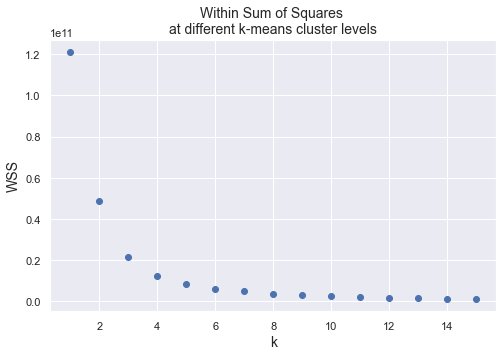

In [22]:
plt.gcf().set_size_inches(8,5)
elbowDiagram(dfn, max_k=15, out_wss=False)

<div class="alert alert-block alert-info">
    We can see that the marginal decrease in WSS beyond k=4 is not very significant. So, we will build our model with k = 4.
</div>

#### K-means model

##### Unstandardized data
First, let us build our model on unstandardized data.

In [23]:
model_k = KMeans(n_clusters=4, random_state=1)
model_k.fit(dfn)

KMeans(n_clusters=4, random_state=1)

In [24]:
clust_k = model_k.predict(dfn)      # model_k.labels_

fd(pd.Series(clust_k))

,freq,%
0,95,32
1,63,21
2,27,9
3,115,38


In [25]:
# Cluster centroids
pd.DataFrame(model_k.cluster_centers_, index=np.unique(clust_k), columns=[i for i in dfn.columns])

,age,income,kids,male,homeOwner,subscriber
0,43.754415,63363.204614,1.431579,0.442105,0.410526,0.084211
1,29.587043,21631.788196,1.063492,0.571429,0.301587,0.158730
2,54.240592,88950.828656,0.481481,0.407407,0.814815,0.111111
3,42.389094,47799.838146,1.434783,0.469565,0.530435,0.165217


</a><div class="alert alert-block alert-info">
    The groups appear to vary by age, income and home-ownership.<br>
    There is very little variation in gender ratio.
</div>

In [26]:
# Points closest to the cluster centers
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(model_k.cluster_centers_, dfn)
closest

array([ 18, 110, 188,  10], dtype=int64)

Observation 110 is closest to the center of cluster 0, 238 to cluster 1 and so on.

##### Clusplot
We visualize the clusters by plotting them against a dimensional plot. 
clusplot() will perform dimensional reduction with principal components or multidimensional scaling as the data warrant, and then plot the observations with cluster membership identified

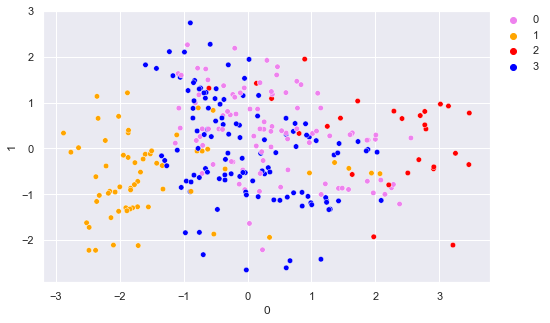

In [27]:
clustplot(dfn_sz, clust_k, standardize=False)

##### Segment distributions

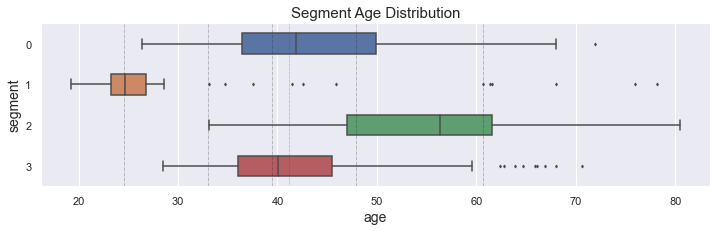

In [28]:
# Age distribution in groups
segment_boxplot(df.age, model_k.labels_, title='Segment Age Distribution', xlab='age')

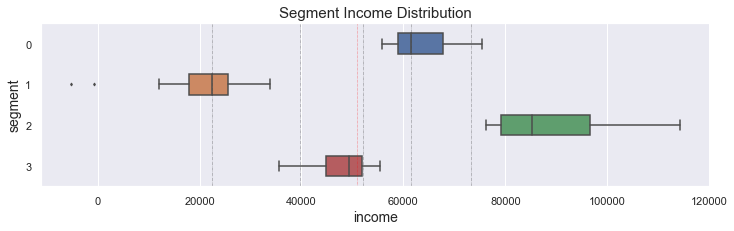

In [29]:
# Income distribution in groups
segment_boxplot(df.income, model_k.labels_, title='Segment Income Distribution', xlab='income')

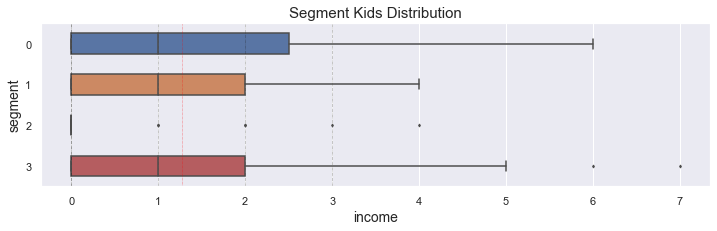

In [30]:
# Kids distribution in groups
segment_boxplot(df.kids, model_k.labels_, title='Segment Kids Distribution', xlab='income')

In [31]:
# Home ownership
for i in np.unique(model_k.labels_):
    print(f'Cluster : {i}')
    print(fd(df.ownHome[model_k.labels_ == i]))
    print('\n')

Cluster : 0
        freq   %
ownNo     56  59
ownYes    39  41


Cluster : 1
        freq   %
ownNo     44  70
ownYes    19  30


Cluster : 2
        freq   %
ownNo      5  19
ownYes    22  81


Cluster : 3
        freq   %
ownNo     54  47
ownYes    61  53




In [32]:
# Overall summary
df.select_dtypes(include='number').describe().round(1)

,age,income,kids
count,300.0,300.0,300.0
mean,41.2,50936.5,1.3
std,12.7,20137.5,1.4
min,19.3,-5183.4,0.0
25%,33.0,39656.3,0.0
50%,39.5,52014.4,1.0
75%,47.9,61403.2,2.0
max,80.5,114278.3,7.0


In [33]:
# Value counts of factors
for var in df.select_dtypes(include='category').columns:
    print(f'Variable : {var}')
    print(pd.concat([df[var].value_counts(), df[var].value_counts(normalize=True).round(3)*100], 
                      axis=1, keys=['count','perc']))
    print('\n')

Variable : gender
        count  perc
Female    157  52.3
Male      143  47.7


Variable : ownHome
        count  perc
ownNo     159  53.0
ownYes    141  47.0


Variable : subscribe
        count  perc
subNo     260  86.7
subYes     40  13.3




<a id='obs-kmeans'></a>

<div class="alert alert-block alert-info">
<h5>Segment distinguishing features</h5><br>
    <b>Group 0</b><br>
    - <b>Age</b>: mix of old and young, but slightly older than average<br>
    - <b>Income</b>: high<br>
    - <b>Kids</b>: distribution similar to overall sample<br>
    - <b>Gender</b>: mixed gender ratio<br>
    - <b>Home-ownership</b>: 41% (slightly lower than overall rate of 47%)<br>
    - <b>Subscribe</b>: lowest subscription rates<br>
    <br>
    <b>Group 1</b><br>
    - <b>Age</b>: young<br>
    - <b>Income</b>: low income<br>
    - <b>Kids</b>: distribution similar to overall sample<br>
    - <b>Gender</b>: mostly male (57%)<br>
    - <b>Home-ownership</b>: lowest home-ownership rates at 30% (overall 47%)<br>
    - <b>Subscribe</b>: high subscription rates<br>
    <br>
    <b>Group 2</b><br>
    - <b>Age</b>: old<br>
    - <b>Income</b>: highest income group (in the top 90th percentile overall)<br>
    - <b>Kids</b>: mostly don't have kids<br>
    - <b>Gender</b>: predominantly female (60%)<br>
    - <b>Home-ownership</b>: high home-ownership (almost double the overall rate of 47%)<br>
    - <b>Subscribe</b>: slightly below avg subscription rate<br>
    <br>
    <b>Group 3</b><br>
    - <b>Age</b>: mix of old and young, but slightly younger than average<br>
    - <b>Income</b>: middle level income<br>
    - <b>Kids</b>: distribution similar to overall sample<br>
    - <b>Gender</b>: mixed, same as overall (47% males, 53% females)<br>
    - <b>Home-ownership</b>: 53%, slightly above overall rate of 47%<br>
    - <b>Subscribe</b>: highest subscription rate<br>
</div>

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Standardized data

In [34]:
model_k_sz = KMeans(n_clusters=4, random_state=1)
model_k_sz.fit(dfn_sz)

KMeans(n_clusters=4, random_state=1)

In [35]:
# Frequency table - Clusters
clust_k_sz = model_k_sz.predict(dfn_sz)
fd(pd.Series(clust_k_sz))

,freq,%
0,39,13
1,91,30
2,92,31
3,78,26


In [36]:
# Segment-wise means
seg_summ(dfn, clust_k_sz)

,age,income,kids,male,homeOwner,subscriber
cluster,,,,,,
0,38.599344,45006.917378,1.282051,0.461538,0.435897,1.000000
1,35.045163,49682.364920,1.769231,0.000000,0.318681,0.000000
2,35.208379,44625.519102,1.771739,1.000000,0.336957,0.000000
3,56.746664,62808.309131,0.089744,0.423077,0.820513,0.012821


<a id='obs-kmeans2'></a>

<div class="alert alert-block alert-info">
<h5>Segment distinguishing features</h5><br>
    The differentiation between the groups has reduced considerably compared with the model built on unstandardized data.<br>
    Groups 0-2 have similar ages, incomes, home-ownership rates amongst themselves, but differ from group 3.<br>
    Groups 1 and 2 are non-subscibers that have similar feature means, and differ on gender only.<br>
    Group 0 contains subscribers, who are similar to group 1 and 2 in all respects except having 46% males.<br>
    <br>
    <b>Unstandardized data has provided a more meaningful and useful segmentation for this dataset.</b>
</div>

##### Segment distributions

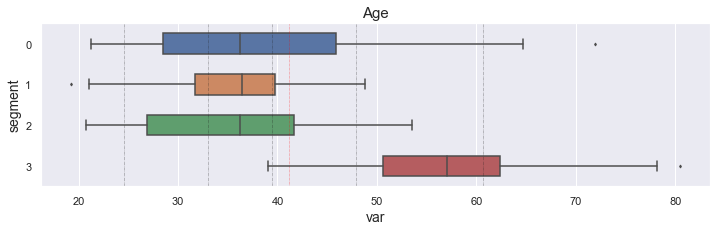

In [37]:
segment_boxplot(dfn.age, clust_k_sz, title='Age')

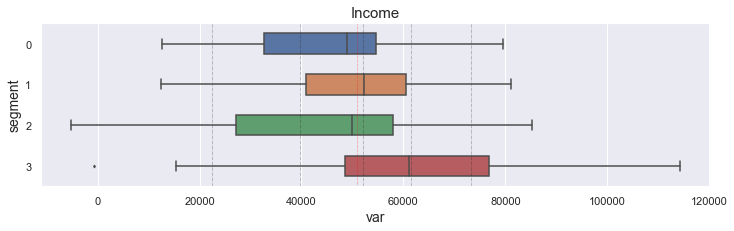

In [38]:
segment_boxplot(dfn.income, clust_k_sz, 'Income')

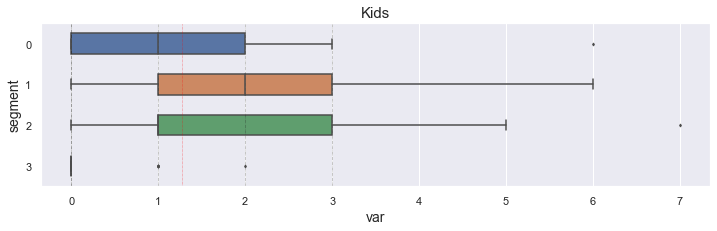

In [39]:
segment_boxplot(dfn.kids, clust_k_sz, 'Kids')

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Hierarchical clustering

<b>Agglomerative approach (bottom-up)</b><br>
The clustering process begins with each observation in its own cluster. 
Then observations are clustered together with other observations that are closest to them. 
Centroid of this cluster is then used to measure distance of other observations from it based on which further clustering takes place.
This process continues until all the observations are linked.<br>

<b>Divisive approach (top-down)</b><br>
All observations are presumed to belong to one big cluster and splits are performed recursively by moving dissimilar points into separate clusters.
[To divide the data](https://stats.stackexchange.com/questions/148094/how-to-perform-divisive-hierarchical-clustering), we start by finding the single point which is the most dissimilar to the rest of the cluster.
The most dissimilar point is found by calculating the average distance of that point with all the other points.
The point with the higest average distance is the most dissimilar.
The process stops when we have the desired number of clusters.<br>

<b><i>Which approach is best for you?</i></b><br>
It is always worth trying all the options, but in general, [agglomerative clustering is better](https://towardsdatascience.com/hierarchical-clustering-on-categorical-data-in-r-a27e578f2995) in discovering small clusters, and is used by most software; divisive clustering — in discovering larger clusters.<br>

<b><i>We will use the agglomerative approach here with gower's distance as the metric for dissimilarity matrix - a matrix that reports a metric for the distance between each pair of observation.</i></b>

#### Dissimilarity matrix

In [40]:
import gower

# gower does not recognize the 'category' type, so will need to convert that
tempdf = df.copy()
for col in tempdf.select_dtypes('category').columns:
    tempdf[col] = tempdf[col].astype('str')

# Calculate gower coefficient
gower_d = gower.gower_matrix(tempdf)

# Sample of matrix
gower_d[0:5,0:5]

array([[0.        , 0.25328153, 0.23290278, 0.261725  , 0.4161338 ],
       [0.25328153, 0.        , 0.06799781, 0.41294932, 0.30144686],
       [0.23290278, 0.06799781, 0.        , 0.4246012 , 0.2932957 ],
       [0.261725  , 0.41294932, 0.4246012 , 0.        , 0.22654359],
       [0.4161338 , 0.30144686, 0.2932957 , 0.22654359, 0.        ]], dtype=float32)

In [41]:
# Understanding the dimensions of the Gower's Distance matrix
a = pd.DataFrame(gower_d)
b = pd.concat([a.apply(lambda x: min(x)), a.apply(lambda x: max(x))], 
              axis=1, keys=['min','max']).T
b

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.640466,0.627514,0.630225,0.642766,0.683291,0.709348,0.722094,0.669863,0.669657,0.618489,...,0.639023,0.77275,0.691986,0.684095,0.631416,0.600384,0.680153,0.651476,0.629872,0.703377


In [42]:
max(b.loc['max'])

0.8111075758934021

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Hierarchical Clustering
Resources : [1](https://www.thinkdatascience.com/post/2019-12-16-introducing-python-package-gower/) , [2](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

In [43]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cut_tree
from scipy.spatial.distance import squareform

In [44]:
clust_hc = linkage(squareform(gower_d), method='complete')
clust_hc

array([[8.40000000e+01, 2.90000000e+02, 1.76507013e-03, 2.00000000e+00],
       [1.25000000e+02, 1.26000000e+02, 2.51056440e-03, 2.00000000e+00],
       [1.19000000e+02, 1.24000000e+02, 2.91917776e-03, 2.00000000e+00],
       ...,
       [5.92000000e+02, 5.94000000e+02, 6.17942750e-01, 4.00000000e+01],
       [5.93000000e+02, 5.95000000e+02, 6.62737429e-01, 2.60000000e+02],
       [5.96000000e+02, 5.97000000e+02, 8.11107576e-01, 3.00000000e+02]])

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Dendrogram

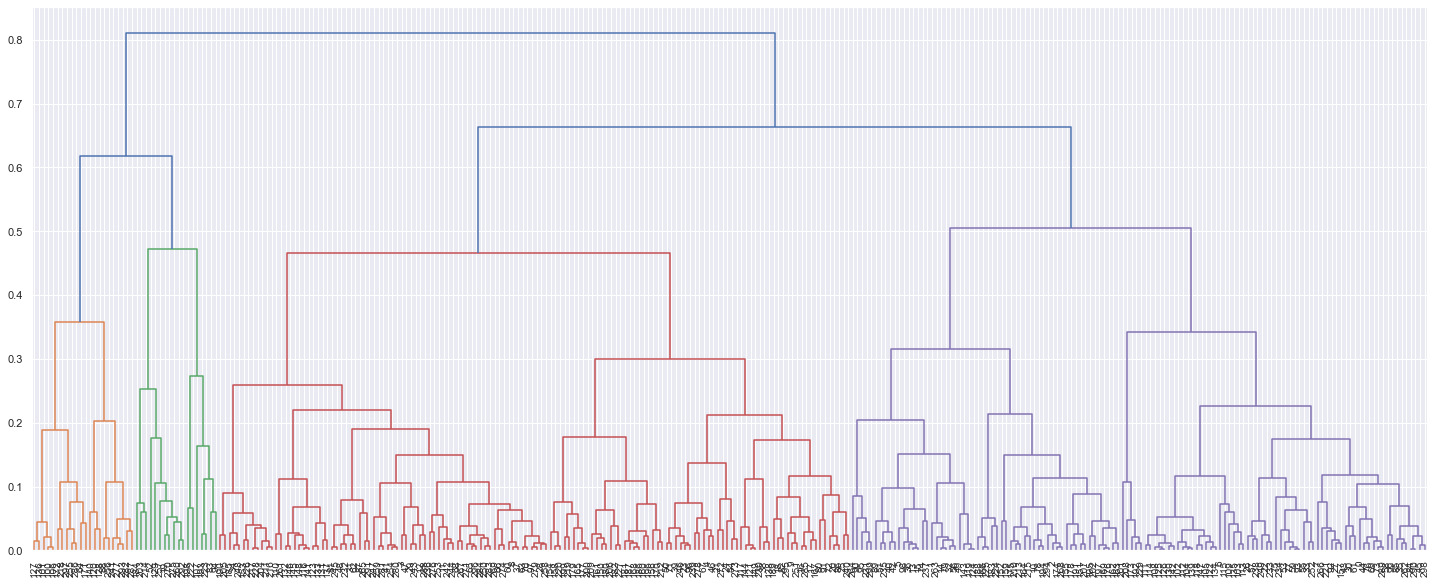

In [45]:
plt.figure(figsize=(25,10))
dendrogram(clust_hc, leaf_font_size=10);

<b>A hierarchical dendrogram is interpreted primarily by height and where observations are joined. 
The height represents the dissimilarity between elements that are joined.</b>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Segment assignments
<i>How do we get specific segment assignments?<br></i>
A dendrogram can be cut into clusters at any height desired, resulting in different numbers of groups.<br>
Because a dendrogram can be cut at any point, the analyst must specify the number of groups desired.<br><br>
Looking at the dendrogram, k = 4 seems to be a good cut-off point.

In [46]:
clust_hc_segments = fcluster(clust_hc, 4, criterion='maxclust')
pd.Series(clust_hc_segments).value_counts()

3    136
4    124
1     22
2     18
dtype: int64

We can see that groups 1 and 2 dominate the assignment.

###### Alternative

In [47]:
from sklearn.cluster import AgglomerativeClustering
ac_model = AgglomerativeClustering(n_clusters = 4, affinity='precomputed', linkage='complete')
clust_hc2 = ac_model.fit(gower_d)
clust_hc2_segments = ac_model.fit_predict(gower_d)
pd.Series(clust_hc2_segments).value_counts()

2    136
0    124
3     22
1     18
dtype: int64

#### Segment summary

In [48]:
# Mean factor value for each segment
seg_summ(dfn, clust_hc2_segments)

,age,income,kids,male,homeOwner,subscriber
cluster,,,,,,
0,40.784556,49454.075091,1.314516,1.000000,0.467742,0.0
1,44.311939,52628.416596,1.388889,0.388889,1.000000,1.0
2,42.034923,53759.624533,1.235294,0.000000,0.477941,0.0
3,35.829349,40456.141298,1.136364,0.545455,0.000000,1.0


<div class="alert alert-block alert-info">
We can see that groups 0 and 2 represent non-subscribers that have been divided along the lines of gender.<br>
Groups 1 and 3 contain subscribers and have been segregated into home owners and renters.<br>
These results are not very nuanced or insightful.
</div>

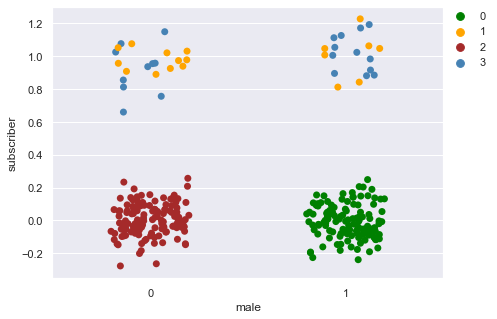

In [49]:
# Plotting segments
plt.gcf().set_size_inches(7,5)
sns.stripplot(x=dfn['male'], y=dfn['subscriber']+np.random.normal(0,.1,size=300), jitter=.2, 
              hue=clust_hc2_segments, palette=['green','orange','brown','steelblue'], 
              s=7, marker = 'o')
plt.legend(bbox_to_anchor=(1.12, 1), borderaxespad=0, frameon=False);

<div class="alert alert-block alert-info">
The reason for such simple and uninteresting results from hierarchical clustering could be the rescaling done on the categorical columns. 
In the dataset, we had only binary categorical variables, that were rescaled to [0,1], which made the two-category factors (gender, ownHome, subscribe) more influential.<br>
We need to try other methods.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Model-based clustering (incomplete)

The key idea for model-based clustering is that observations come from groups with different statistical distributions (such as different means and variances). 
The algorithms try to find the best set of such underlying distributions to explain the observed data.

Such models are also known as "mixture models" because it is assumed that the data reflect a mixture of observations drawn from different populations, although we don’t know which population each observation was drawn from. 
We are trying to estimate the underlying population parameters and the mixture proportion.

<b>Gaussian Mixture Model</b><br>
It is presumed that the clusters come from different distributions but all of them are gaussian or normal distributions.
The algorithm used below (Mclust) assumes a Gaussian Mixture Model.

Maybe helpful<br>
https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f

In [50]:
from sklearn.mixture import GaussianMixture

In [76]:
gmm = GaussianMixture(n_components=4).fit(dfn)
gmm.predict(dfn)

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 3, 3, 0, 0, 0, 0, 3, 3, 2, 2, 0,
       3, 0, 0], dtype=int64)

In [77]:
seg_summ(dfn, gmm.predict(dfn))

,age,income,kids,male,homeOwner,subscriber
cluster,,,,,,
0,37.403453,49595.345361,1.715026,0.481865,0.290155,0.000000
1,23.682825,20081.192737,1.300000,0.600000,0.200000,1.000000
2,53.820837,58274.663479,0.000000,0.472973,1.000000,0.094595
3,40.063407,51996.616328,1.608696,0.391304,0.391304,1.000000


##### BIC scores

In [53]:
models = {}
for k in range(1, 11):
    models['k'+str(k)] = GaussianMixture(n_components=k, n_init=2, random_state=1).fit(dfn)

In [54]:
for m in models:
    print(models[m].bic(dfn))

11261.9401116636
7834.251761127949
7933.878000621998
6972.378186362119
6423.007247479967
6426.633833928164
6235.046452279086
6556.174724974513
4399.591712788208
6652.117267859221


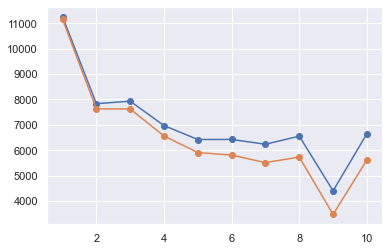

In [55]:
plt.plot(range(1,11), [models[m].bic(dfn) for m in models], label='BIC', marker='o')
plt.plot(range(1,11), [models[m].aic(dfn) for m in models], label='AIC', marker='o');

In [56]:
# https://www.kaggle.com/vipulgandhi/gaussian-mixture-models-clustering-explained
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [57]:
X_principal = dfn.copy()
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        
        tmp_bic.append(gmm.bic(X_principal))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

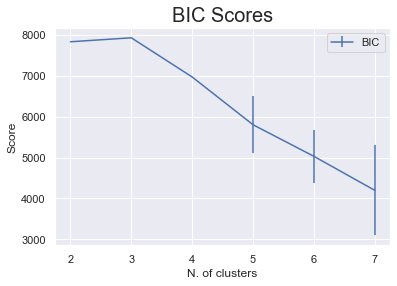

In [58]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

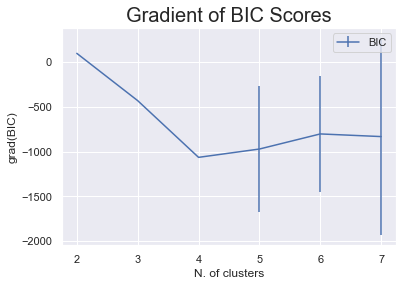

In [59]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### d) Latent Class Analysis (no code)

A latent class model (LCM) relates a set of observed (usually discrete) multivariate variables to a set of latent variables. [(wiki)](https://en.wikipedia.org/wiki/Latent_class_model)<br>
Latent variables are variables that are not directly observed but have been inferred from other variables that have been observed.  

Latent class analysis (LCA) is used to find groups or subtypes of cases in multivariate categorical data and is similar to mixture modeling in the assumption that differences are attributable to unobserved groups that one wishes to uncover. 

But since LCA can be done on categorical variables only, we'll need to convert our numeric variables into categories. 
One of the ways to do that is simply recode the numerical column as binary with regards to a specified cutting point.<br>

Here, we will use median as the cutoff point.

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 7) Comparing Cluster Solutions

Given that we know the real group membership, how does it compare to clustering method's results?<br>

The answer is not as simple as counting agreement. There are 2 reasons for that:<br>
    1) It is not obvious how to match one cluster solution to another because the order of group labels is arbitrary. Group 1 under 1 method might appear as group 3 under another.<br>
    2) Second, if we solve the matching problem we still need to adjust for chance agreement.
    Is an agreement rate of 90% good? It depends on the base rate. If base rate is 50% (like gender ratio in the world), then 90% accuracy is much better than chance (50%). If base rate is 99%+ (Japanese speakers in Japan), then 90% accuracy is terrible.

In [60]:
from sklearn.metrics import adjusted_rand_score

#### kmeans segments vs y

In [61]:
pd.crosstab(pd.Series(model_k.labels_), y, dropna=False)

Segment,Moving up,Suburb mix,Travelers,Urban hip
row_0,,,,
0,25,43,27,0
1,1,5,7,50
2,0,6,21,0
3,44,46,25,0


In [62]:
adjusted_rand_score(model_k.labels_, y)

0.20177486142483086

#### heirarchical segments vs y

In [63]:
pd.crosstab(pd.Series(clust_hc_segments), y, dropna=False)

Segment,Moving up,Suburb mix,Travelers,Urban hip
row_0,,,,
1,9,2,3,8
2,5,4,7,2
3,38,45,37,16
4,18,49,33,24


In [64]:
adjusted_rand_score(clust_hc_segments, y)

0.021520949805032236

<div class="alert alert-block alert-info">
    Adjusted Rand Index of the Kmeans model (0.201) suggests there is a mild benefit of using the model over random chance segmentation.<br><br>
    Adjusted Rand Index of the Hierarchical Model (0.021) close to 0 suggests that there is not much difference in its segmentation compared with random chance.
</div>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 8) Concluding summary

Above we learned a few methods for identifying potential groups of observations in a data set.
The problem of how to predict (classify) observations into groups after those groups have been defined, falls under classification.<br>

<b>Two points that are crucial for success in segmentation projects :</b><br>
1) Different methods are likely to yield different solutions, and in general there is no absolute “right” answer. We recommend to try multiple clustering methods with different potential numbers of clusters.<br>

2) The results of segmentation are primarily about business value, and solutions should be evaluated in terms of both model fit (e.g., using BIC()) and business utility. Although model fit is an important criterion and should not be overlooked, it is ultimately necessary that an answer can be communicated to and used by stakeholders.

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

[go to toc](#index)

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th>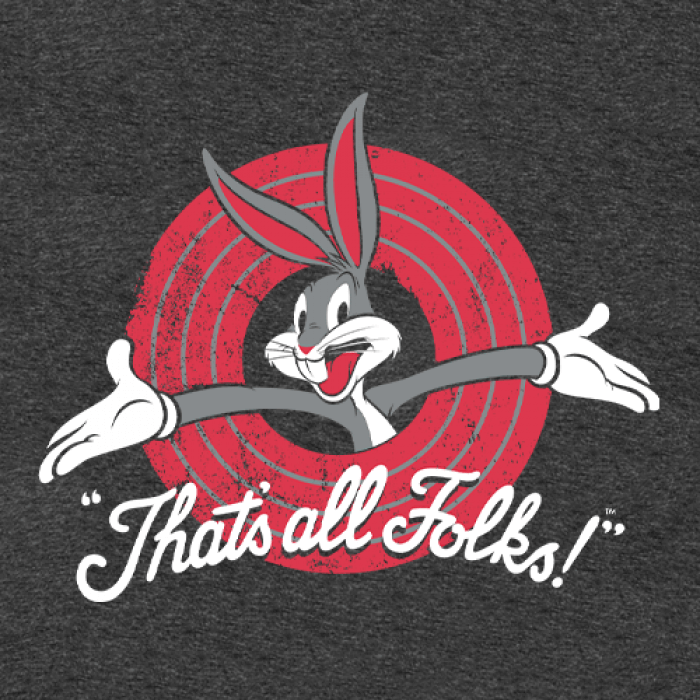</th><th style="float:right"></th>
    <th><b> &ensp;--------------------------------------------</b></th>
</tr>
</table>